**important Libraries**
**===============================↓** 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  # Corrected import statement
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score 
import warnings 
warnings.filterwarnings("ignore")  # Corrected typo in warnings


**Load Dataset of Breast Cancer** 
**This dataset is not available for direct download. It can be downloaded from the UCI Machine Learning Repository**

In [5]:
df=pd.read_csv("E:/Machine_learning_practice/K_NN\KNNAlgorithmDataset.csv")

In [7]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
df=df.drop(columns=['id',"Unnamed: 32"],axis=1)

In [10]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                5 non-null      object 
 1   radius_mean              5 non-null      float64
 2   texture_mean             5 non-null      float64
 3   perimeter_mean           5 non-null      float64
 4   area_mean                5 non-null      float64
 5   smoothness_mean          5 non-null      float64
 6   compactness_mean         5 non-null      float64
 7   concavity_mean           5 non-null      float64
 8   concave points_mean      5 non-null      float64
 9   symmetry_mean            5 non-null      float64
 10  fractal_dimension_mean   5 non-null      float64
 11  radius_se                5 non-null      float64
 12  texture_se               5 non-null      float64
 13  perimeter_se             5 non-null      float64
 14  area_se                  5 non

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,17.992000,16.824000,119.676000,1042.620000,0.111108,0.186568,0.204760,0.110934,0.214120,0.070328,...,22.27800,21.888000,149.394000,1565.340000,0.155520,0.469600,0.498160,0.222880,0.39932,0.109056
std,3.807929,4.495134,23.985368,388.421771,0.021523,0.090845,0.078139,0.028872,0.035668,0.017542,...,4.27208,4.605814,31.217506,586.182504,0.033351,0.294925,0.199403,0.045873,0.17109,0.039020
min,11.420000,10.380000,77.580000,386.100000,0.084740,0.078640,0.086900,0.070170,0.180900,0.056670,...,14.91000,16.670000,98.870000,567.700000,0.123800,0.186600,0.241600,0.162500,0.23640,0.076780
25%,17.990000,14.340000,122.800000,1001.000000,0.100300,0.132800,0.197400,0.104300,0.181200,0.058830,...,22.54000,17.330000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.186000,0.27500,0.087580
50%,19.690000,17.770000,130.000000,1203.000000,0.109600,0.159900,0.198000,0.105200,0.206900,0.059990,...,23.57000,23.410000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.36130,0.089020
75%,20.290000,20.380000,132.900000,1297.000000,0.118400,0.277600,0.241400,0.127900,0.241900,0.078710,...,24.99000,25.530000,158.800000,1956.000000,0.162200,0.665600,0.686900,0.257500,0.46010,0.118900
max,20.570000,21.250000,135.100000,1326.000000,0.142500,0.283900,0.300100,0.147100,0.259700,0.097440,...,25.38000,26.500000,184.600000,2019.000000,0.209800,0.866300,0.711900,0.265400,0.66380,0.173000


In [14]:
df.groupby('diagnosis').size()

diagnosis
M    5
dtype: int64

In [15]:
X =df.drop("diagnosis", axis=1).values
y=df["diagnosis"].values

In [16]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [17]:
y

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [18]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [19]:
y

array([0, 0, 0, 0, 0])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (4, 30)
y_train: (4,)
X_test: (1, 30)
y_test: (1,)


In [21]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
def knn_func(X_train, y_train, X_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return y_pred


In [29]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
l=len(df)
l

5

In [31]:
k_max = math.sqrt(l)
k_max

2.23606797749979

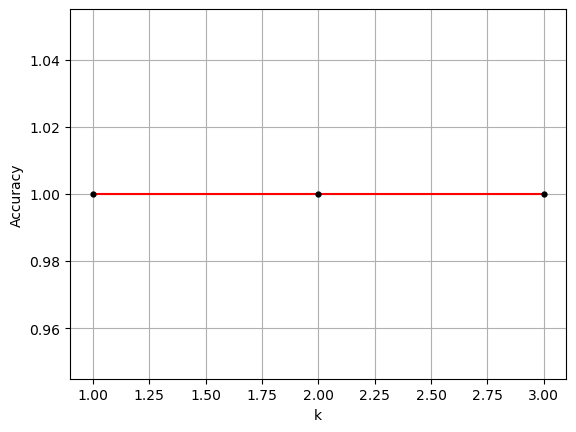

In [47]:
normal_accuracy = []
k_value = range(1, min(len(X_train), 24))  # Limit k to the number of samples in X_train or 24, whichever is smaller

for k in k_value:
    y_predict = knn_func(X_train, y_train, X_test, k)
    accur = accuracy_score(y_test, y_predict)
    normal_accuracy.append(accur)

plt.plot(k_value, normal_accuracy, c="red", marker=".", ms=7, mfc="black", mec="black")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [38]:
y_pred = knn_func(X_train, y_train, X_test, 3)  # Use k=3



In [39]:
def accuracyScore(test_labels,pred_labels):
    correct = np.sum(test_labels == pred_labels)
    n = len(test_labels)
    acc = correct / n 
    return acc

In [42]:
print("Model Accuracy %{}".format(accuracyScore(y_test,y_pred)))

Model Accuracy %1.0


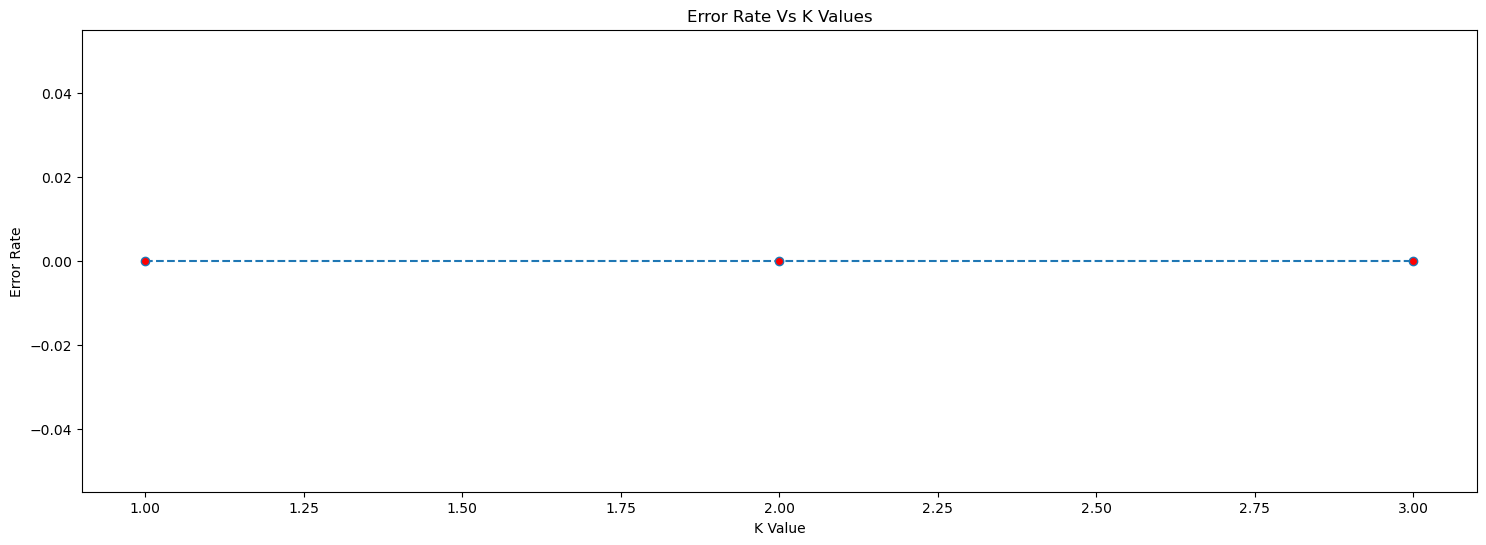

In [46]:
error_rate = []
k_values = range(1, min(len(X_train), 100))  # Limit k to the number of samples in X_train or 100, whichever is smaller

for k in k_values:
    y_pred = knn_func(X_train, y_train, X_test, k)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rate.append(error)

plt.figure(figsize=(18,6))
plt.plot(k_values, error_rate, linestyle="--", marker="o", markerfacecolor="red", markersize=6)
plt.title("Error Rate Vs K Values")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.show()
